<a href="https://colab.research.google.com/github/AyaTaha16/Generative_AI_DEPI/blob/main/Hands_on_EDA_%26_Preprocessing(Salaries_DS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading from Drive

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#https://drive.google.com/file/d/1v54nqQoexM00y0X6CqkEwV_aHIPMq11r/view?usp=sharing
file_id = '1v54nqQoexM00y0X6CqkEwV_aHIPMq11r'
url = f'https://drive.google.com/uc?export=download&id={file_id}'


df = pd.read_csv(url)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


#EDA

In [ ]:
print(df.columns)
print(df.info())
print(df.describe())

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status         

In [ ]:
print(df.isnull().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [ ]:
Agency = df['Agency'].unique()
print(Agency)

['San Francisco']


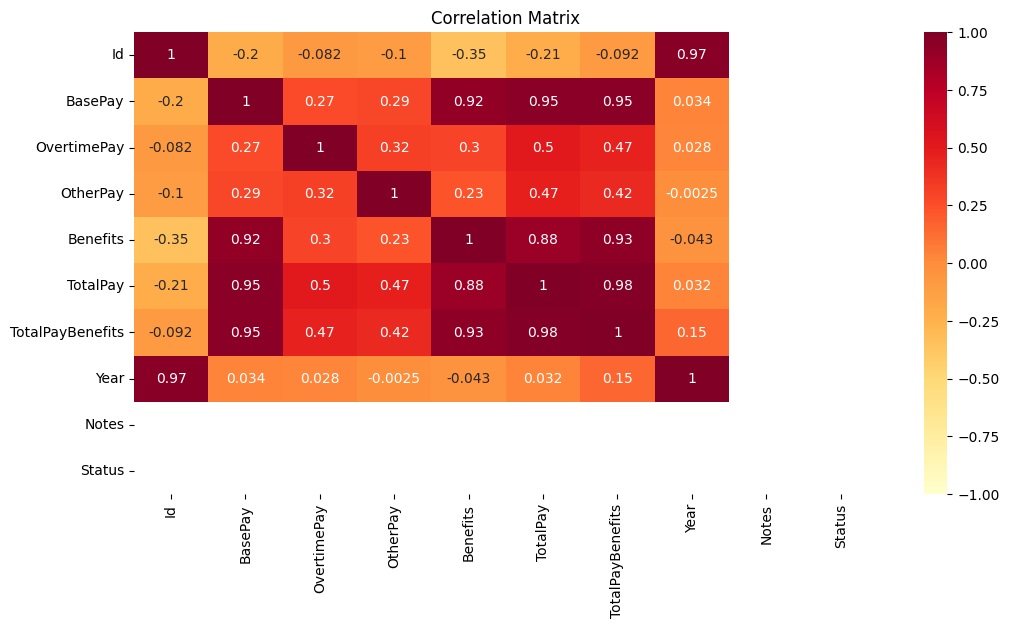

In [ ]:
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#Data Preprocessing

In [ ]:
columns_to_drop = ['Id','EmployeeName', 'Notes', 'Status','Agency']
df = df.drop(columns_to_drop, axis=1)
df[['BasePay', 'OvertimePay', 'OtherPay']] = df[['BasePay', 'OvertimePay', 'OtherPay']].fillna(df[['BasePay', 'OvertimePay', 'OtherPay']].median())
print(df.isnull().sum())

JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64


In [ ]:
job_title_counts = df['JobTitle'].value_counts()
print(job_title_counts)

JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: count, Length: 2159, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the "JobTitle" column
le = LabelEncoder()
df['JobTitle'] = le.fit_transform(df['JobTitle'])
print(df['JobTitle'])

0          831
1          293
2          293
3         2125
4          576
          ... 
148649     562
148650    1274
148651    1274
148652    1274
148653     523
Name: JobTitle, Length: 148654, dtype: int64


In [ ]:
df['Benefits'] = df['Benefits'].fillna(0)


In [ ]:
# Identify the column with missing values
col_with_missing = 'Benefits'

# Split the data into features and target
X = df.drop(col_with_missing, axis=1)
y = df[col_with_missing]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the "Benefits" values for rows with 0 in the "Benefits" column
df_with_0_benefits = df[df['Benefits'] == 0]
predicted_benefits = model.predict(df_with_0_benefits.drop('Benefits', axis=1))

# Replace the 0 values in the "Benefits" column with the predicted values
df.loc[df['Benefits'] == 0, 'Benefits'] = predicted_benefits
print(df['Benefits'])


0         1.836773e-10
1         2.605105e-10
2         2.544260e-10
3         1.188102e-10
4         7.863342e-11
              ...     
148649   -5.922625e-11
148650    4.260774e-11
148651    4.260774e-11
148652    4.260774e-11
148653   -5.949735e-11
Name: Benefits, Length: 148654, dtype: float64


#Modeling

In [ ]:
X = df.drop('TotalPayBenefits', axis=1)
y = df['TotalPayBenefits']

model = LinearRegression()

# Apply Recursive Feature Elimination
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)

# Print the selected features
print("Selected Features:")
for i, feature in enumerate(X.columns):
    if rfe.support_[i]:
        print(feature)


Selected Features:
JobTitle
OvertimePay
Benefits
TotalPay
Year


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#Evaluation

In [ ]:
# Calculate the R-squared value
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

R-squared: 1.0
